<a href="https://colab.research.google.com/github/piyushrgone/Stock-Market-Analysis-with-prediction-using-LSTM/blob/main/Stock_Market_Analysis_with_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project - Stock Market Analysis

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of INDI inc using LSTM)

## Importing Data from Yahoo Finance



In [14]:
!pip install -q yfinance

In [15]:
import yfinance as yf
#yf.set_tz_cache_location("custom/cache/location")
#...

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

### Imports

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Testing one stock "Microsoft"

In [17]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

In [18]:
# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1688403605,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 337.99,
 'chartPreviousClose': 335.4,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'end': 1688563800,
   'start': 1688544000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'end': 1688587200,
   'start': 1688563800,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'end': 1688601600,
   'start': 1688587200,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [19]:
# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
2022-03-05 00:00:00-05:00    7496869888
2022-03-16 00:00:00-04:00    7595310080
2022-03-17 00:00:00-04:00    7496869888
2022-03-28 00:00:00-04:00    7507230208
2022-03-31 00:00:00-04:00    7496869888
2022-04-01 00:00:00-04:00    7631819776
2022-04-02 00:00:00-04:00    7496869888
2022-04-04 00:00:00-04:00    7496869888
2022-04-29 00:00:00-04:00    7479029760
2022-06-09 00:00:00-04:00    7536840192
2022-06-13 00:00:00-04:00    7479029760
2022-07-28 00:00:00-04:00    7464000000
2022-08-01 00:00:00-04:00    7457889792
2022-08-25 00:00:00-04:00    7475469824
2022-08-26 00:00:00-04:00    7457889792
2022-09-01 00:00:00-04:00    7457889792
2022-09-02 00:00:00-04:00    7488540160
2022-09-02 00:00:00-04:00    7457889792
2022-09-10 00:00:00-04:00    7290379776
2022-09-12 00:00:00-04:00    7457889792


In [20]:
# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Tax Effect Of Unusual Items,0.0,0.0,-10640000.0,0.0
Tax Rate For Calcs,0.192917,0.192438,0.19,0.182896
Normalized EBITDA,25901000000.0,24047000000.0,24918000000.0,24513000000.0
Total Unusual Items,162000000.0,-232000000.0,-56000000.0,-80000000.0
Total Unusual Items Excluding Goodwill,162000000.0,-232000000.0,-56000000.0,-80000000.0
Net Income From Continuing Operation Net Minority Interest,18299000000.0,16425000000.0,17556000000.0,16740000000.0
Reconciled Depreciation,3549000000.0,3648000000.0,2790000000.0,3979000000.0
Reconciled Cost Of Revenue,16128000000.0,17488000000.0,15452000000.0,16429000000.0
EBIT,22352000000.0,20399000000.0,22072000000.0,20534000000.0
Net Interest Income,252000000.0,210000000.0,141000000.0,56000000.0


In [21]:
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Ordinary Shares Number,7437000000.0,7447000000.0,7457000000.0,7464000000.0
Share Issued,7437000000.0,7447000000.0,7457000000.0,7464000000.0
Net Debt,21648000000.0,32470000000.0,25738000000.0,35850000000.0
Total Debt,60522000000.0,60114000000.0,60282000000.0,61270000000.0
Tangible Book Value,116864000000.0,104877000000.0,95299000000.0,87720000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,104427000000.0,99508000000.0,107244000000.0,104757000000.0
Other Short Term Investments,77865000000.0,83862000000.0,84360000000.0,90826000000.0
Cash And Cash Equivalents,26562000000.0,15646000000.0,22884000000.0,13931000000.0
Cash Equivalents,18053000000.0,8342000000.0,15647000000.0,5673000000.0


In [22]:
# - cash flow statement
msft.cashflow

,2022-06-30,2021-06-30,2020-06-30
Free Cash Flow,65149000000.0,56118000000.0,45234000000.0
Repurchase Of Capital Stock,-32696000000.0,-27385000000.0,-22968000000.0
Repayment Of Debt,-9023000000.0,-3750000000.0,-5518000000.0
Issuance Of Debt,NaN,NaN,0.0
Issuance Of Capital Stock,1841000000.0,1693000000.0,1343000000.0
Capital Expenditure,-23886000000.0,-20622000000.0,-15441000000.0
End Cash Position,13931000000.0,14224000000.0,13576000000.0
Beginning Cash Position,14224000000.0,13576000000.0,11356000000.0
Effect Of Exchange Rate Changes,-141000000.0,-29000000.0,-201000000.0
Changes In Cash,-152000000.0,677000000.0,2421000000.0


In [23]:
msft.quarterly_cashflow

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Free Cash Flow,17834000000.0,4899000000.0,16915000000.0,17758000000.0
Repurchase Of Capital Stock,-5509000000.0,-5459000000.0,-5573000000.0,-8757000000.0
Repayment Of Debt,0.0,-750000000.0,-1000000000.0,0.0
Issuance Of Capital Stock,536000000.0,243000000.0,575000000.0,461000000.0
Capital Expenditure,-6607000000.0,-6274000000.0,-6283000000.0,-6871000000.0
End Cash Position,26562000000.0,15646000000.0,22884000000.0,13931000000.0
Beginning Cash Position,15646000000.0,22884000000.0,13931000000.0,12498000000.0
Effect Of Exchange Rate Changes,29000000.0,88000000.0,-230000000.0,-198000000.0
Changes In Cash,10887000000.0,-7326000000.0,9183000000.0,1631000000.0
Financing Cash Flow,-10290000000.0,-11349000000.0,-10883000000.0,-13269000000.0


In [24]:
#to show holders
msft.major_holders

,0,1
0,0.05%,% of Shares Held by All Insider
1,73.77%,% of Shares Held by Institutions
2,73.80%,% of Float Held by Institutions
3,6159,Number of Institutions Holding Shares


In [25]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",649516597,2023-03-30,0.0874,219530108277
1,Blackrock Inc.,537573096,2023-03-30,0.0723,181694325467
2,State Street Corporation,292106885,2023-03-30,0.0393,98729203208
3,"FMR, LLC",200523373,2023-03-30,0.0270,67774892882
4,Price (T.Rowe) Associates Inc,166035734,2023-03-30,0.0223,56118416113
5,"Geode Capital Management, LLC",144365760,2023-03-30,0.0194,48794181812
6,Morgan Stanley,120316895,2023-03-30,0.0162,40665906166
7,JP Morgan Chase & Company,94617741,2023-03-30,0.0127,31979849356
8,Capital World Investors,87608980,2023-03-30,0.0118,29610958294
9,Norges Bank Investment Management,86316926,2022-12-30,0.0116,29174256975


In [26]:
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,226594602,2022-12-30,0.0304,76586707317
1,Vanguard 500 Index Fund,172326589,2022-12-30,0.0232,58244662133
2,Fidelity 500 Index Fund,81720092,2023-02-27,0.0110,27620573097
3,SPDR S&P 500 ETF Trust,80591530,2023-03-30,0.0108,27239130437
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",75130340,2023-03-30,0.0101,25393302882
5,iShares Core S&P 500 ETF,66532494,2023-02-27,0.0089,22487316997
6,Vanguard Growth Index Fund,62920006,2022-12-30,0.0085,21266332213
7,Vanguard Institutional Index Fund-Institutiona...,52237514,2022-12-30,0.0070,17655756846
8,Growth Fund Of America Inc,41256784,2023-03-30,0.0055,13944380021
9,Vanguard Information Technology Index Fund,34018479,2022-11-29,0.0046,11497905384


In [27]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-04-23 06:00:00-04:00,NaN,NaN,NaN
2024-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-01-22 05:00:00-05:00,NaN,NaN,NaN
2023-10-23 06:00:00-04:00,NaN,NaN,NaN
2023-07-24 06:00:00-04:00,2.55,NaN,NaN
2023-04-25 12:00:00-04:00,2.23,2.45,0.0981
2023-01-24 11:00:00-05:00,2.29,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0205
2022-07-26 12:00:00-04:00,2.29,2.23,-0.0274


### now using multiple Tickers

In [28]:
tickers = yf.Tickers('msft aapl goog')

# access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000


In [29]:
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


Testing indian stock :

In [30]:
sbicard = yf.Ticker("SBICARD.NS")

# get all stock info
sbicard.info

{'address1': 'Infinity Towers, Tower B',
 'address2': '2nd Floor Block 2, Building 3 DLF Phase 2, DLF Cyber City',
 'city': 'Gurugram',
 'zip': '122002',
 'country': 'India',
 'phone': '91 12 458 9803',
 'website': 'https://www.sbicard.com',
 'industry': 'Credit Services',
 'industryDisp': 'Credit Services',
 'sector': 'Financial Services',
 'longBusinessSummary': 'SBI Cards and Payment Services Limited, a non-banking financial company, issues credit cards to individual and corporate customers in India. The company also acts as corporate insurance agent for selling insurance policies to credit card customers. It offers corporate cards, central travel cards, utility cards, and corporate purchase and virtual cards. The company was incorporated in 1998 and is based in Gurugram, India. SBI Cards and Payment Services Limited is a subsidiary of State Bank of India.',
 'companyOfficers': [{'maxAge': 1,
   'name': 'Mr. Rama Mohan Rao Amara',
   'title': 'MD, CEO & Director',
   'exercisedValue

## Data set up of "FAIRFAX INDIA HOLDINGS CORPORAT","indie Semiconductor, Inc", "India Fund, Inc. (The)", "Morgan Stanley India Investment"

Now for our analysis I'd be using Indian stocks like "FAIRFAX INDIA HOLDINGS CORPORAT","indie Semiconductor, Inc", "India Fund, Inc. (The)", "Morgan Stanley India Investment"

In [31]:
#stock_list = ['SBICARD.NS', 'SUNPHARMA.NS', 'AXISBANK.NS', 'BHARTIARTL.NS' ]

stock_list = ['FFXDF', 'INDI', 'IFN', 'IIF' ]

from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) #to give us a one year time frame

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [FFXDF, INDI, IFN, IIF ]
company_name = ["FAIRFAX INDIA HOLDINGS CORPORAT","indie Semiconductor, Inc", "India Fund, Inc. (The)", "Morgan Stanley India Investment"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-20,21.170000,21.320000,21.090000,21.160000,21.160000,31200,Morgan Stanley India Investment
2023-06-21,21.160000,21.340000,21.160000,21.260000,21.260000,21700,Morgan Stanley India Investment
2023-06-22,21.230000,21.280001,21.209999,21.230000,21.230000,21000,Morgan Stanley India Investment
2023-06-23,21.120001,21.219999,20.969999,21.049999,21.049999,52700,Morgan Stanley India Investment
2023-06-26,21.120001,21.170000,21.080000,21.129999,21.129999,31500,Morgan Stanley India Investment
2023-06-27,21.180000,21.280001,21.150000,21.280001,21.280001,43900,Morgan Stanley India Investment
2023-06-28,21.389999,21.510000,21.389999,21.459999,21.459999,24200,Morgan Stanley India Investment
2023-06-29,21.469999,21.490000,21.410000,21.459999,21.459999,25700,Morgan Stanley India Investment
2023-06-30,21.510000,21.690001,21.510000,21.670000,21.670000,38300,Morgan Stanley India Investment


In [32]:
FFXDF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,11.952307,12.119877,11.811900,11.964952,11.964952,25197.211155
std,1.410811,1.432722,1.402901,1.425105,1.425105,27116.519544
min,9.400000,9.400000,9.260000,9.260000,9.260000,0.000000
25%,10.749000,10.800000,10.525000,10.743000,10.743000,9500.000000
50%,12.460000,12.660000,12.290000,12.440000,12.440000,17500.000000
75%,13.087500,13.265000,12.949500,13.100000,13.100000,30050.000000
max,14.555000,14.705000,14.200000,14.500000,14.500000,240200.000000


In [33]:
FFXDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-05 to 2023-07-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

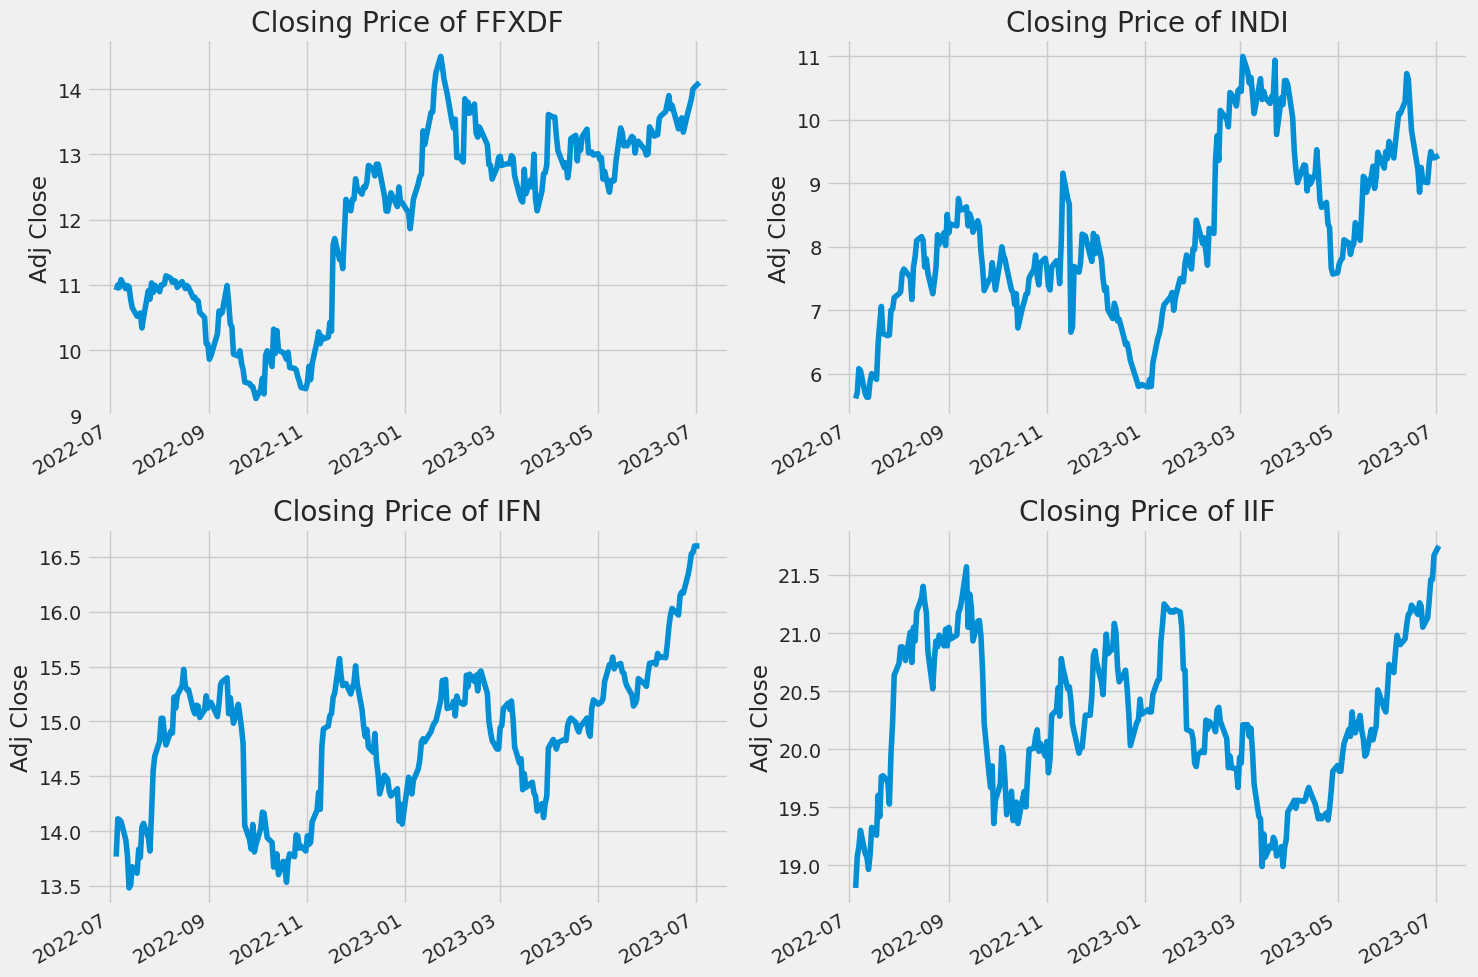

In [34]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

## Stock being traded each day

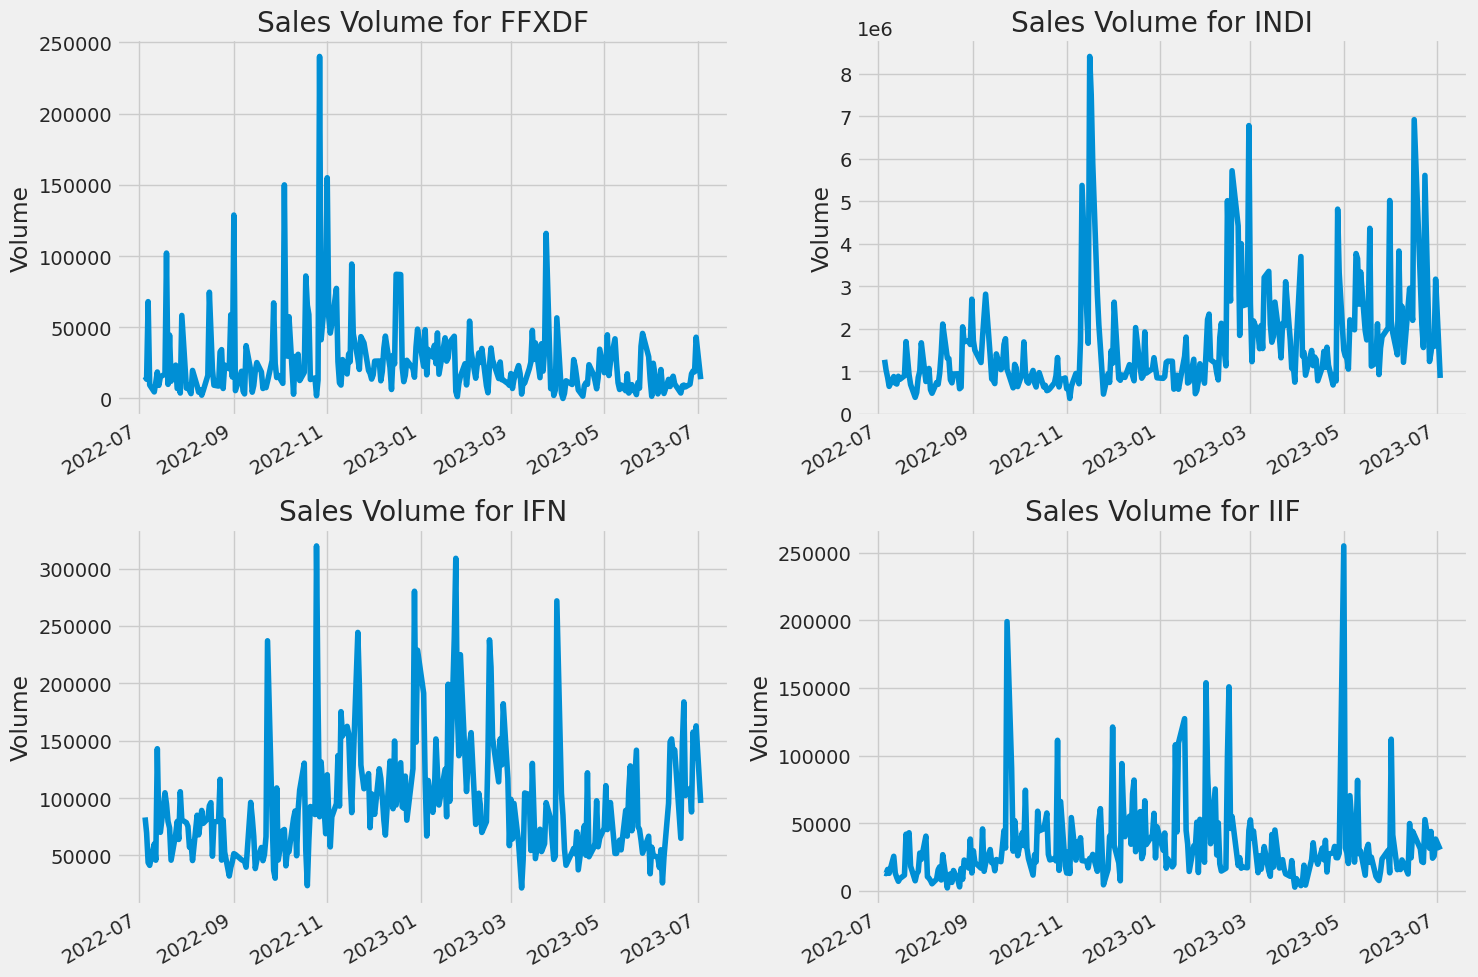

In [35]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

## Moving Average

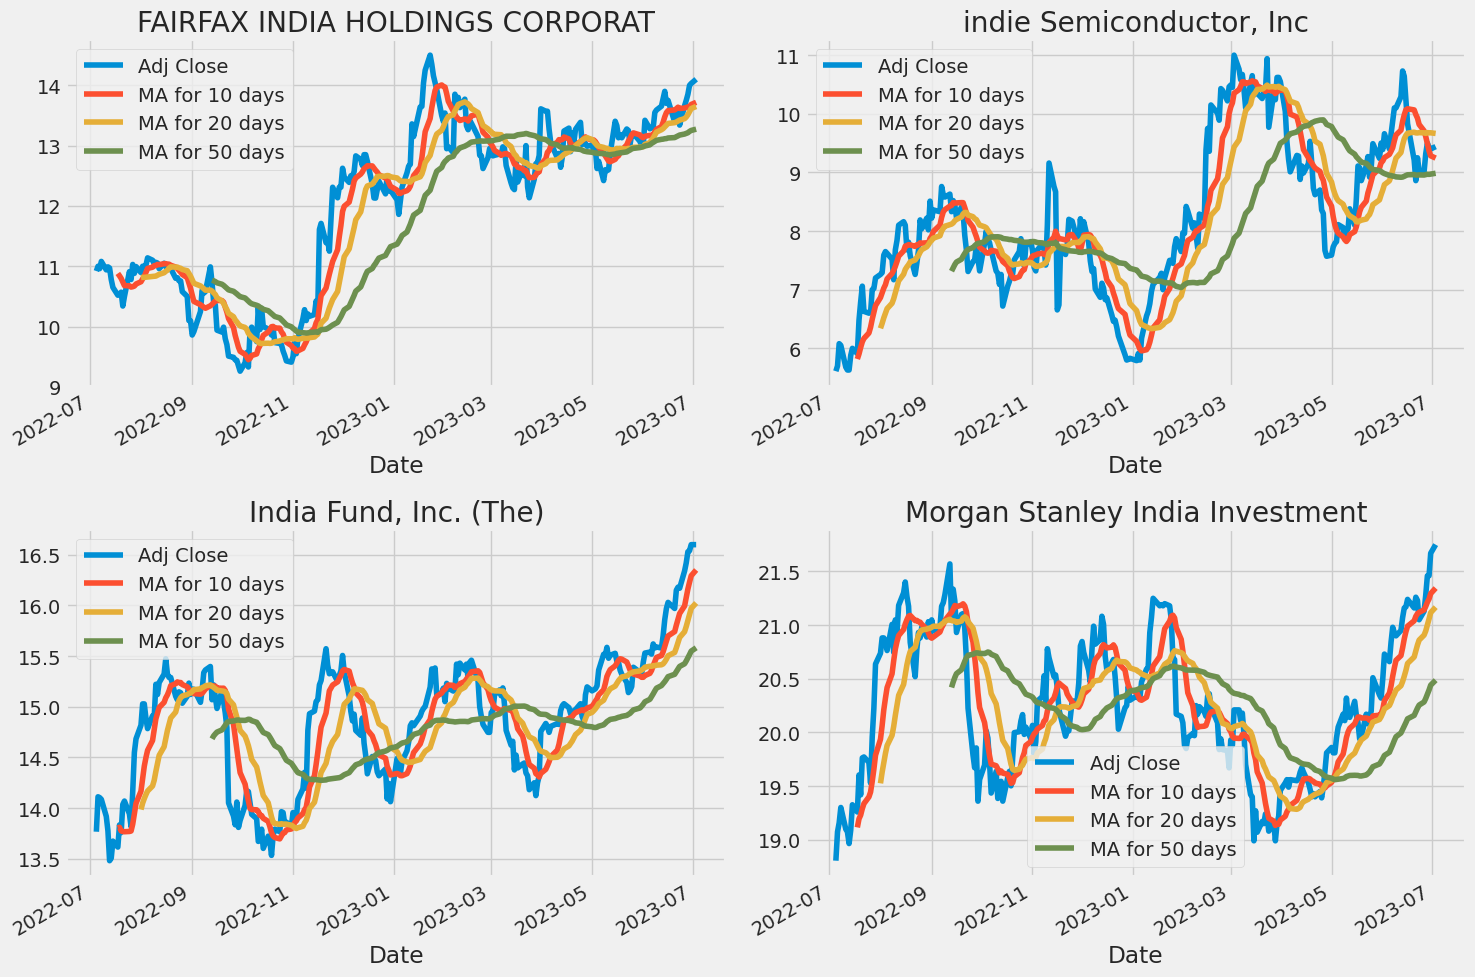

In [36]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FFXDF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FAIRFAX INDIA HOLDINGS CORPORAT')

INDI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('indie Semiconductor, Inc')

IFN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('India Fund, Inc. (The)')

IIF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Morgan Stanley India Investment')

fig.tight_layout()

## Daily Return

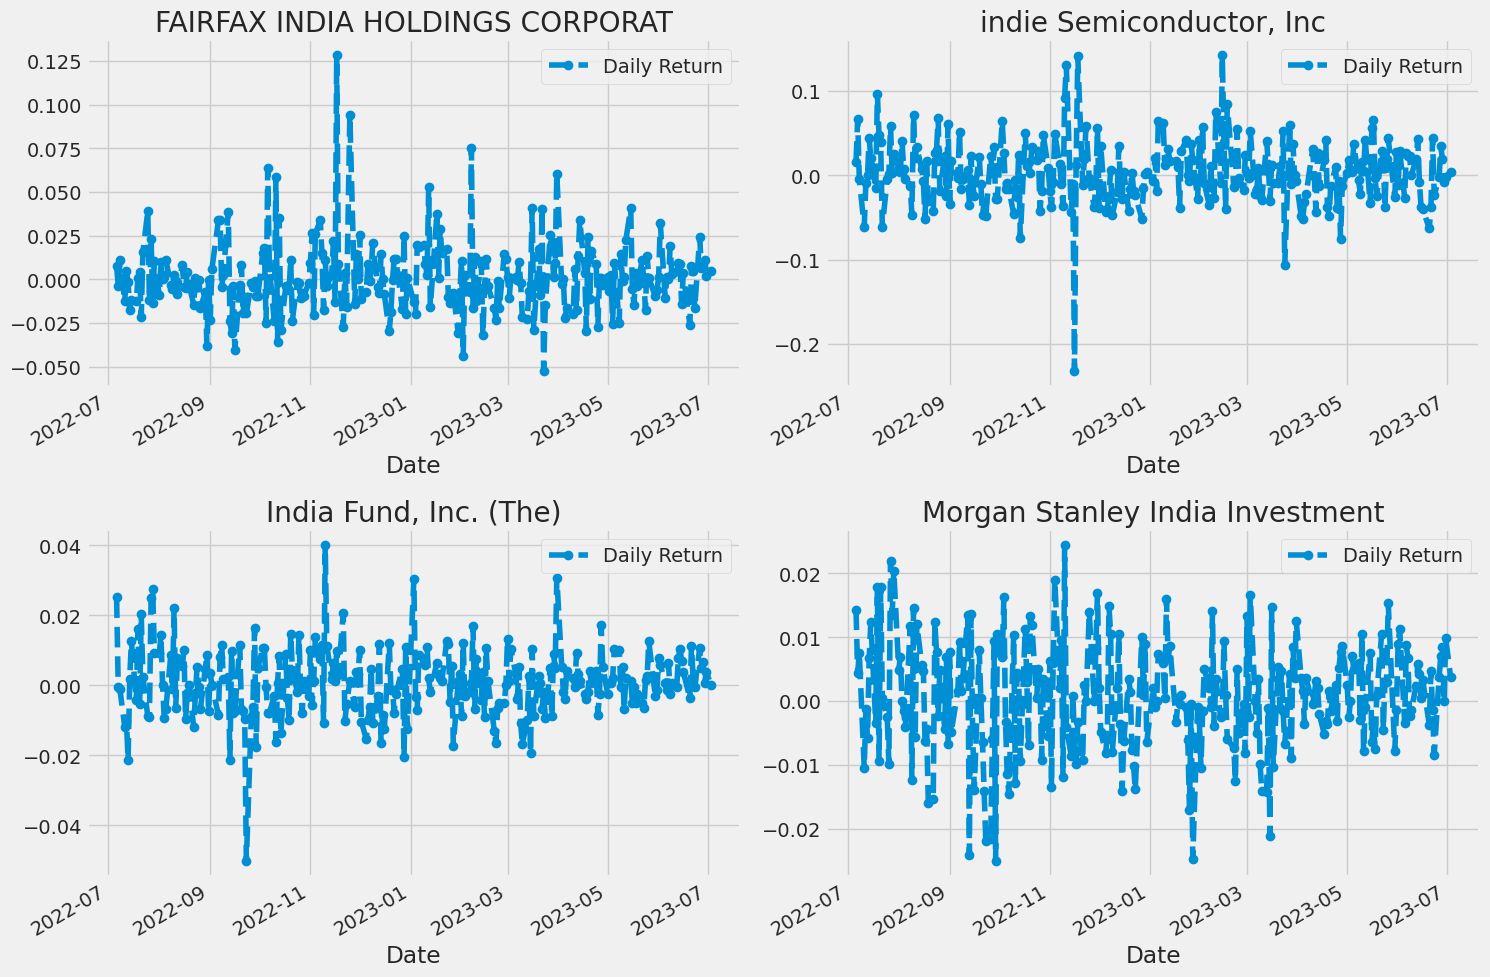

In [37]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FFXDF['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FAIRFAX INDIA HOLDINGS CORPORAT')

INDI['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('indie Semiconductor, Inc')

IFN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('India Fund, Inc. (The)')

IIF['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Morgan Stanley India Investment')

fig.tight_layout()

now let's get an overall look at the average daily return using a histogram. We can use seaborn to create both a histogram and kde plot on the same figure.

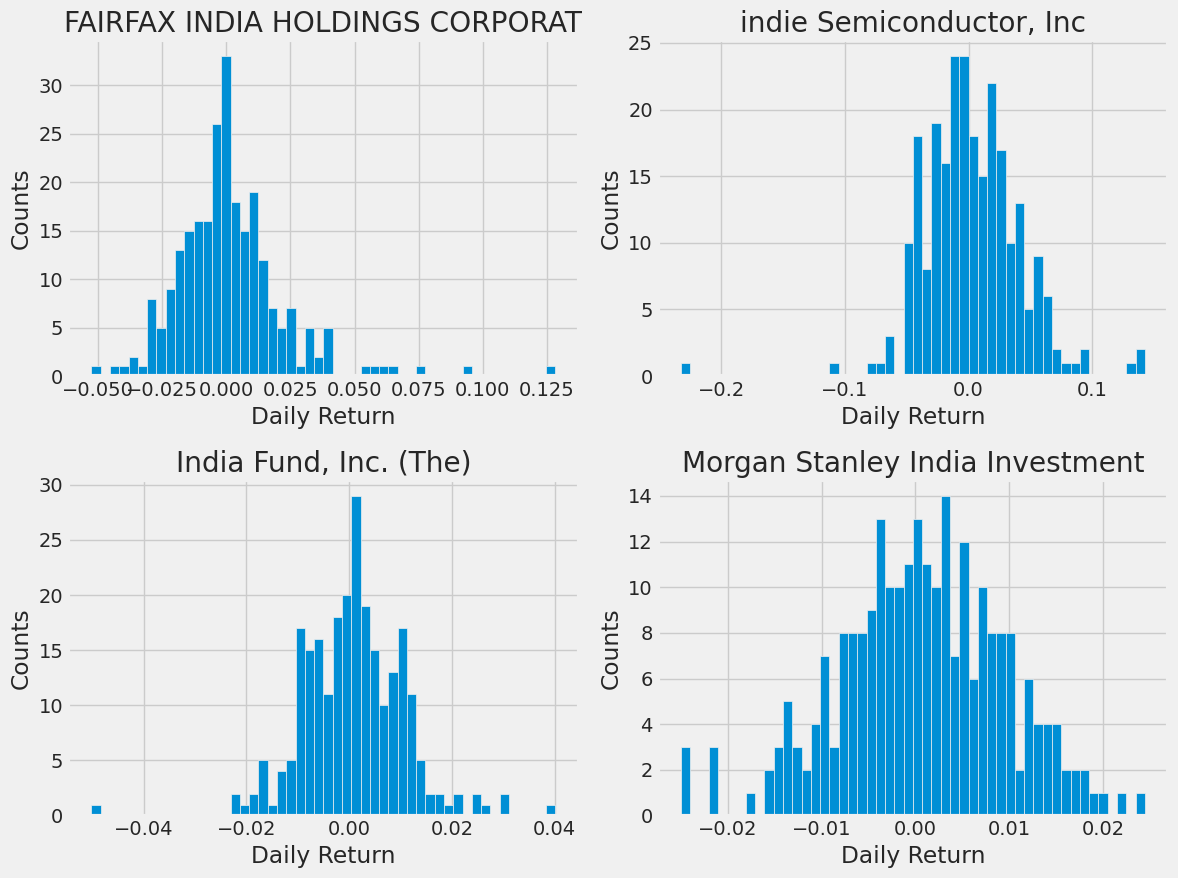

In [38]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

## What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [39]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%***********************]  4 of 4 completed


,FFXDF,IFN,IIF,INDI
Date,,,,
2022-07-05,NaN,NaN,NaN,NaN
2022-07-06,0.007326,0.025046,0.014305,0.016043
2022-07-07,-0.003636,-0.000596,0.004407,0.066667
2022-07-08,0.010949,-0.001193,0.007459,-0.004934
2022-07-11,-0.012635,-0.011940,-0.010453,-0.061157


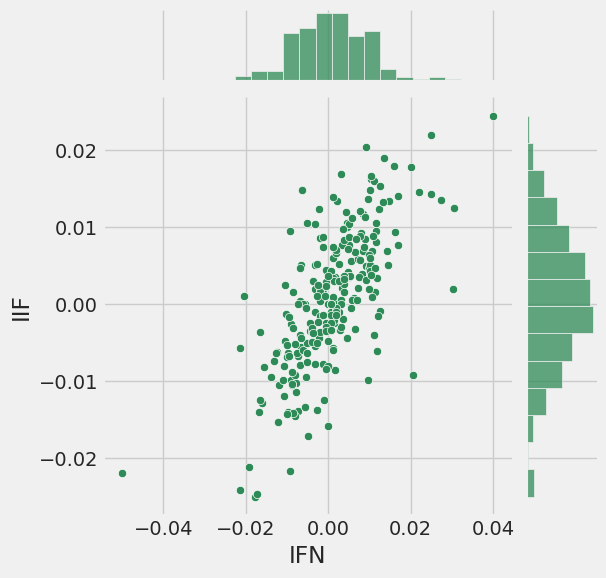

In [40]:
sns.jointplot(x='IFN', y='IIF', data=stock_rets, kind='scatter', color='seagreen')

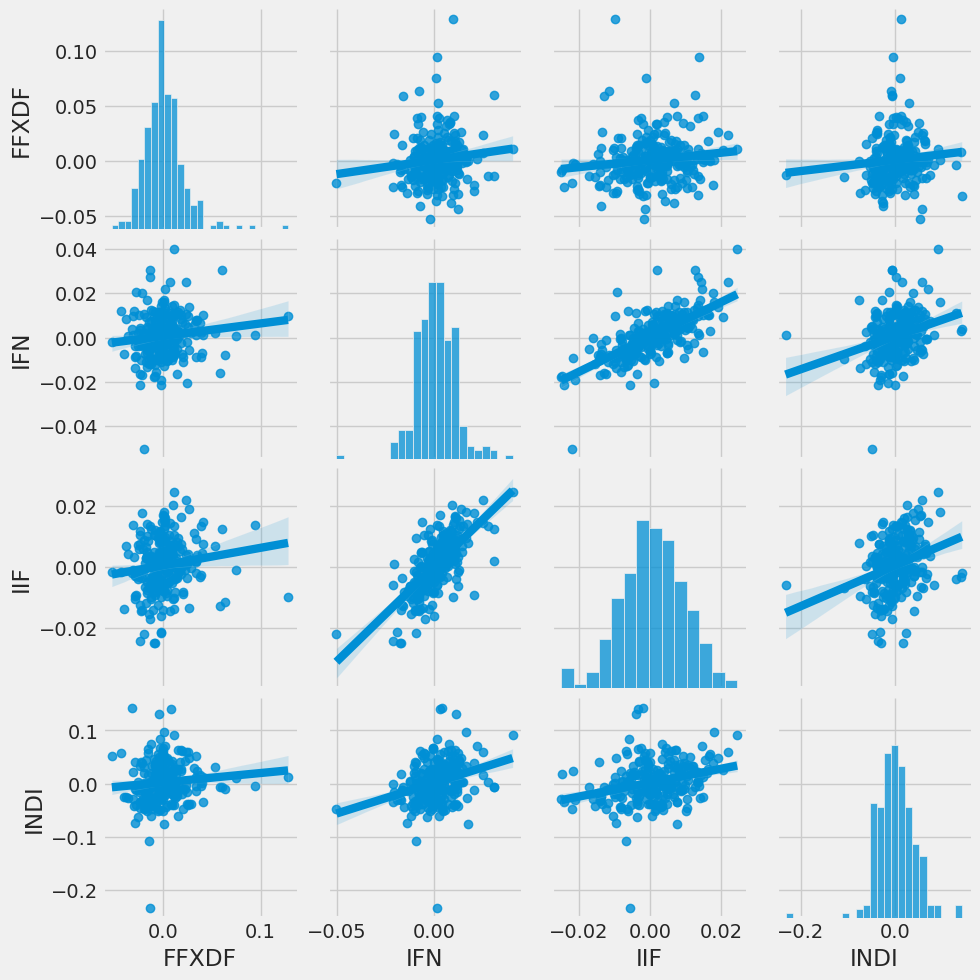

In [41]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(stock_rets, kind='reg')

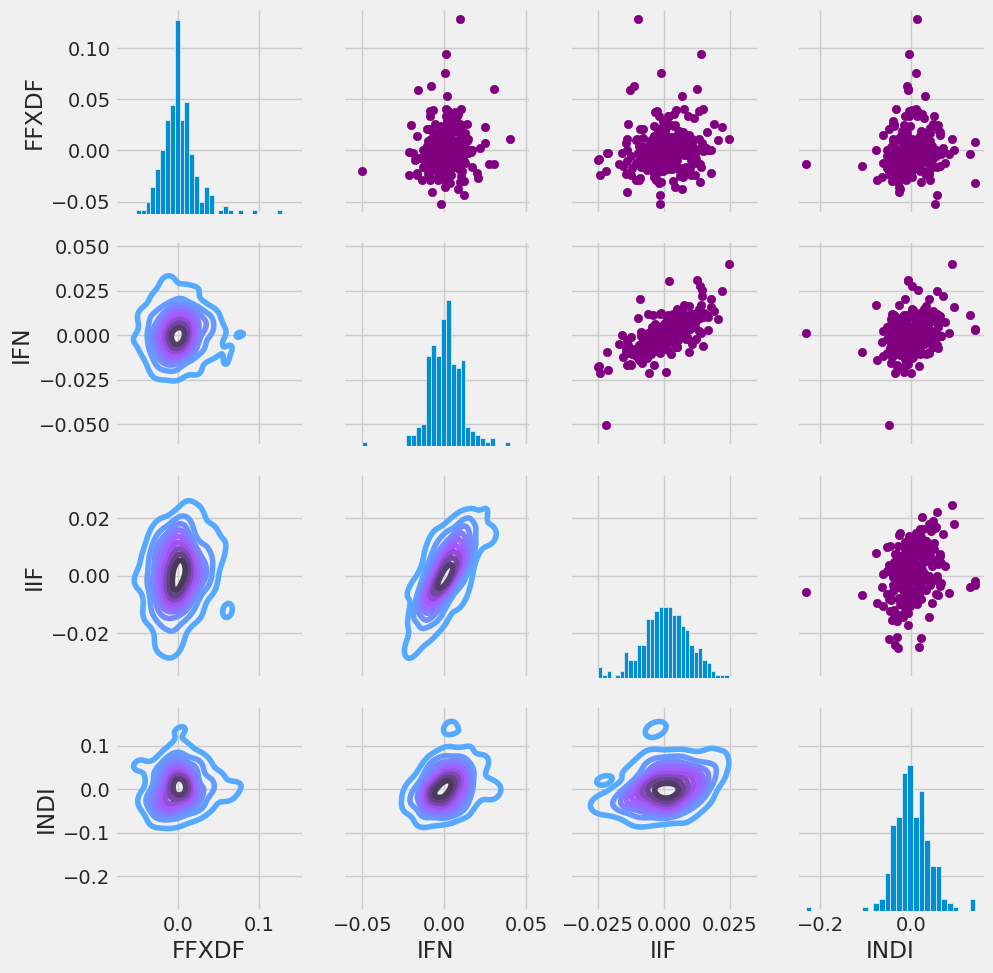

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

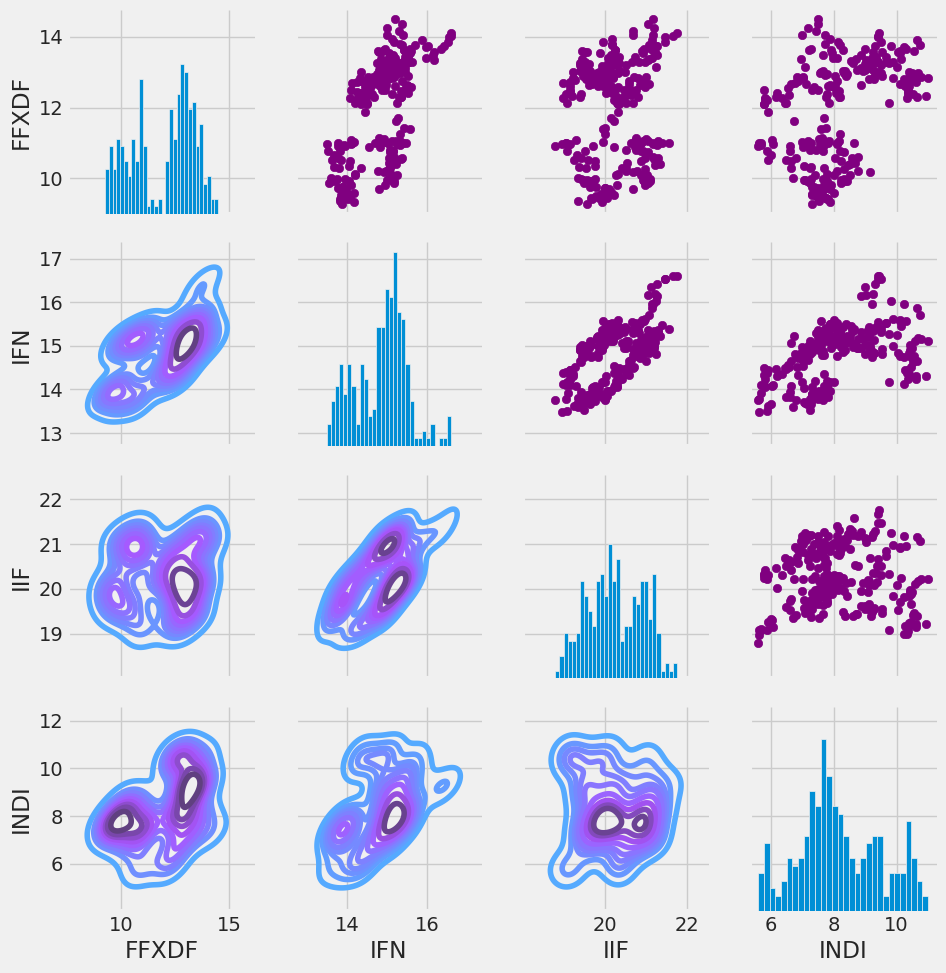

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

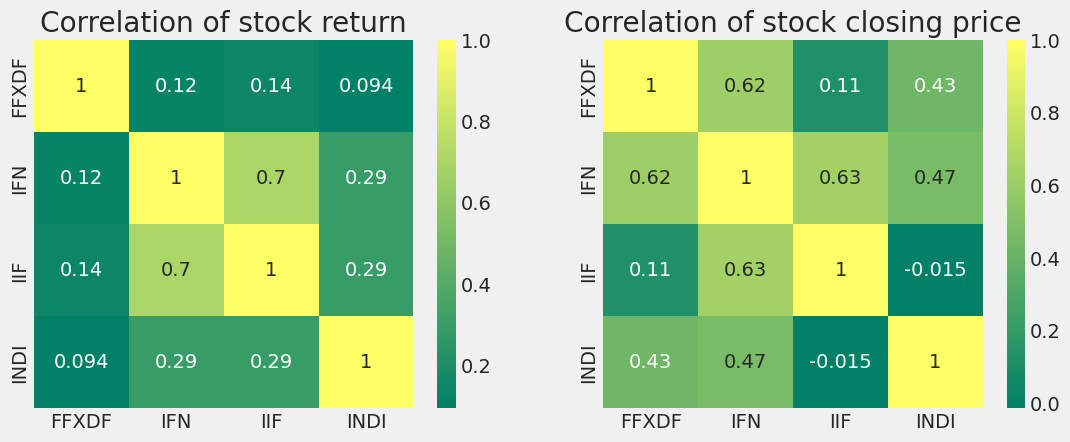

In [45]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## How much value do we put at risk by investing in a particular stock?

comparing the expected return with the standard deviation of the daily returns.

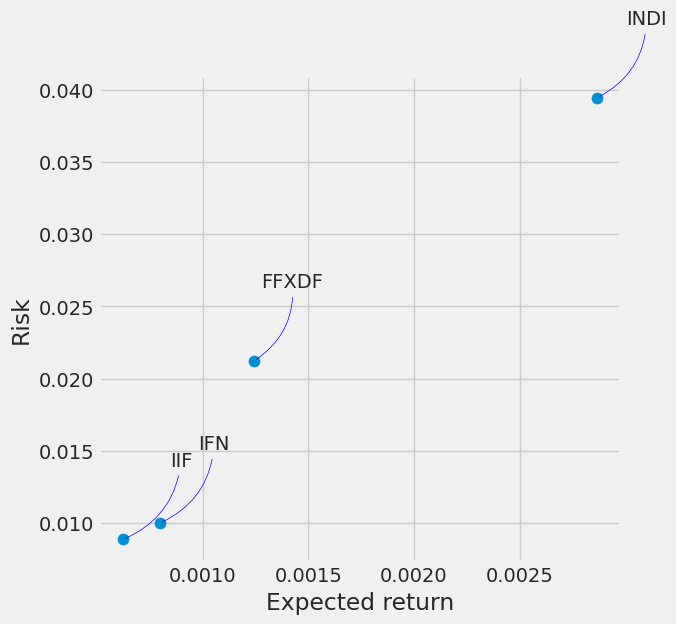

In [46]:
rets = stock_rets.dropna()



plt.figure(figsize=(6, 6))
plt.scatter(rets.mean(), rets.std(), s= np.pi * 20)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of INDI:

In [47]:
df = pdr.get_data_yahoo('INDI', start='2019-10-04', end=datetime.now()) #the IPO opened on 04/10/2019
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-04,9.775,9.80,9.775,9.80,9.80,436000
2019-10-07,9.790,9.79,9.790,9.79,9.79,250000
2019-10-08,9.830,9.83,9.790,9.80,9.80,6400
2019-10-09,9.790,9.81,9.790,9.80,9.80,325700
2019-10-10,9.800,9.90,9.800,9.89,9.89,79100


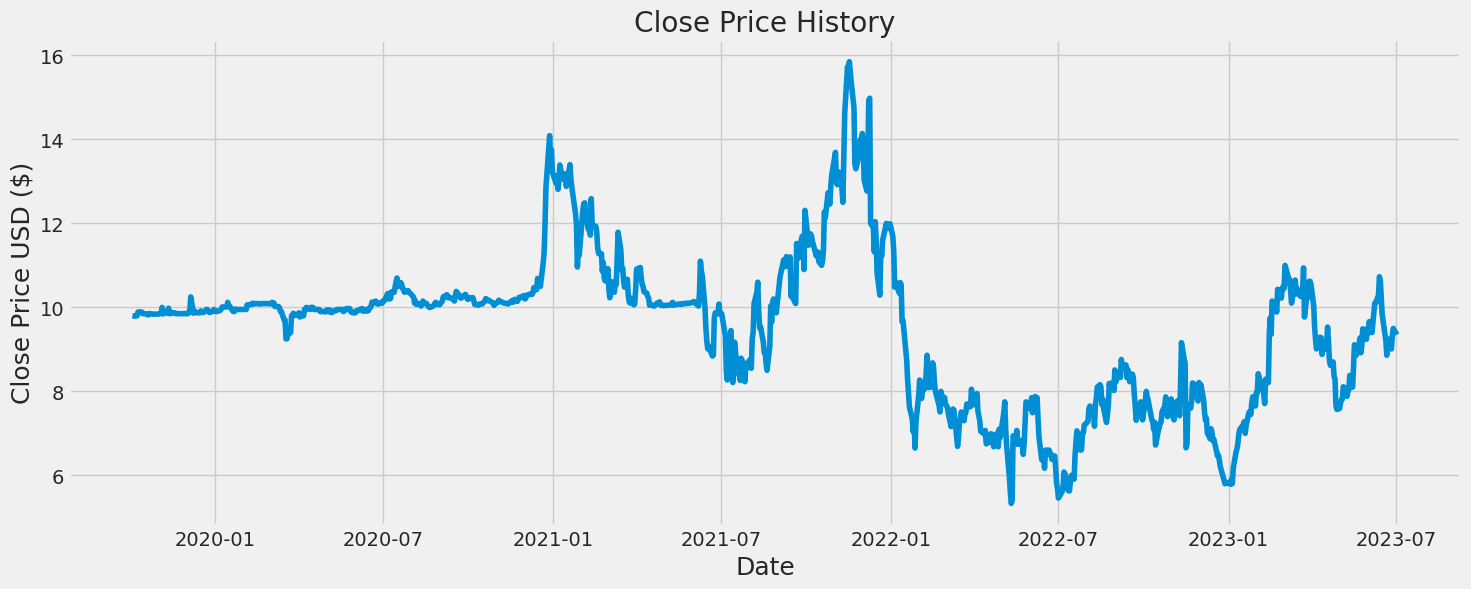

In [48]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

895

In [50]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.42490495],
       [0.42395436],
       [0.42490495],
       [0.42490495],
       [0.4334601 ],
       [0.4334601 ],
       [0.4334601 ],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42680604],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42870723],
       [0.42870723],
       [0.42870723],
       [0.42870723],
       [0.42870723],
       [0.42870723],
       [0.43060832],
       [0.44391634],
       [0.42880223],
       [0.4344106 ],
       [0.43250951],
       [0.43060832],
       [0.44201515],
       [0.42965782],
       [0.42965782],
       [0.43250951],
       [0.43060832],
       [0.43155891],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.42965782],
       [0.4344106 ],
       [0.4334601 ],
       [0.4676806 ],
       [0.43060832],
       [0.4344106 ],
       [0.434

In [51]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.42490495, 0.42395436, 0.42490495, 0.42490495, 0.4334601 ,
       0.4334601 , 0.4334601 , 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42680604, 0.42965782, 0.42965782, 0.42965782,
       0.42870723, 0.42870723, 0.42870723, 0.42870723, 0.42870723,
       0.42870723, 0.43060832, 0.44391634, 0.42880223, 0.4344106 ,
       0.43250951, 0.43060832, 0.44201515, 0.42965782, 0.42965782,
       0.43250951, 0.43060832, 0.43155891, 0.42965782, 0.42965782,
       0.42965782, 0.42965782, 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42965782, 0.4344106 , 0.4334601 , 0.4676806 ,
       0.43060832, 0.4344106 , 0.4344106 , 0.43250951, 0.43155891,
       0.43155891, 0.43583649, 0.43250951, 0.43250951, 0.43250951,
       0.43916347, 0.43916347, 0.43250951, 0.43250951, 0.43536119])]
[0.4391634681108365]

[array([0.42490495, 0.42395436, 0.42490495, 0.42490495, 0.4334601 ,
       0.4334601 , 0.4334601 , 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42680604, 0.429

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
835/835 [==============================] - 10s 7ms/step - loss: 0.0050
Epoch 2/3
835/835 [==============================] - 6s 8ms/step - loss: 0.0024
Epoch 3/3
835/835 [==============================] - 6s 7ms/step - loss: 0.0018


In [54]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 8ms/step


0.4415615021841627

<ipython-input-55-598b3c301c72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


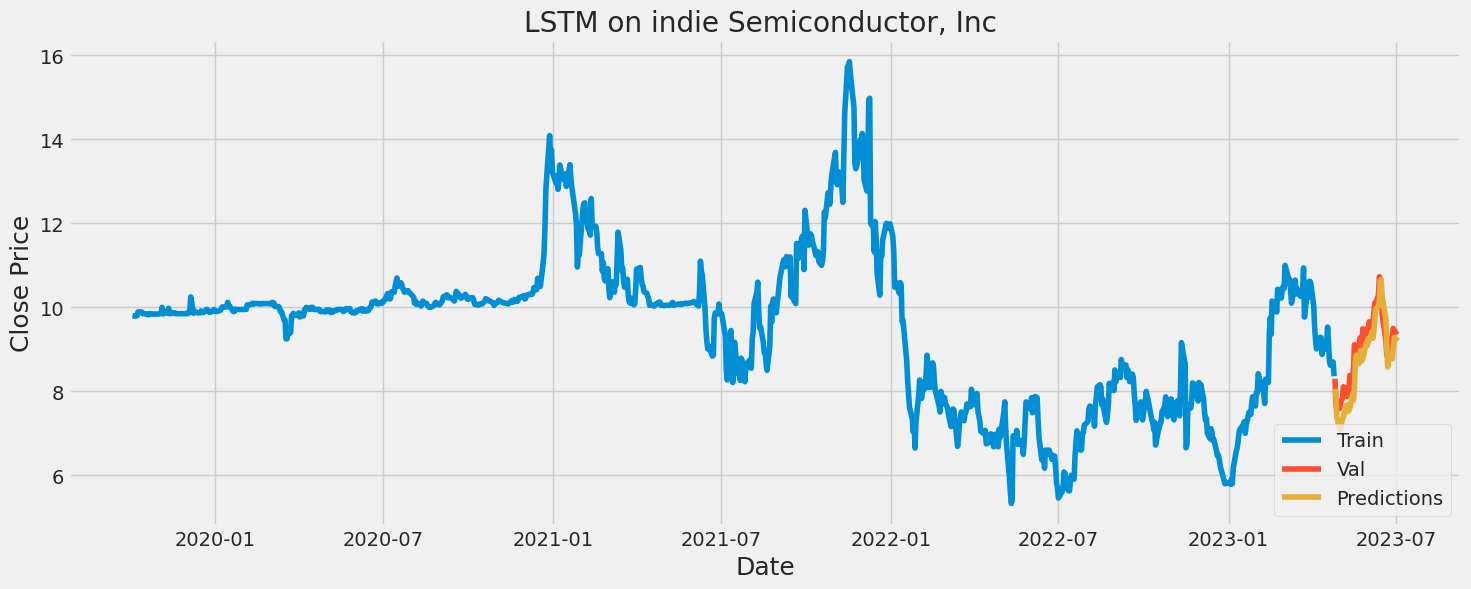

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM on indie Semiconductor, Inc ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
valid

,Close,Predictions
Date,,
2023-04-26,8.30,8.059842
2023-04-27,7.67,7.929298
2023-04-28,7.57,7.383551
2023-05-01,7.59,7.112905
2023-05-02,7.73,7.081296
2023-05-03,7.79,7.221346
2023-05-04,7.82,7.337869
2023-05-05,8.11,7.394814
2023-05-08,8.06,7.639180


# Testing for .NS

In [57]:
tickers = pd.read_html('https://ournifty.com/stock-list-in-nse-fo-futures-and-options.html#:~:text=NSE%20F%26O%20Stock%20List%3A%20%20%20%20SL,%20%201000%20%2052%20more%20rows%20')[0]

In [58]:
tickers = tickers.SYMBOL.to_list()

In [ ]:
for count in range(len(tickers)):
tickers[count] = tickers[count] + ".NS

In [60]:
price_data = yf.download(tickers , start = start, end = end)

[*********************100%***********************]  192 of 192 completed

ERROR:yfinance:
184 Failed downloads:
ERROR:yfinance:['BALRAMCHIN', 'RELIANCE', 'ZYDUSLIFE', 'COALINDIA', 'CHAMBLFERT', 'ICICIGI', 'TATACHEM', 'TATAPOWER', 'BIOCON', 'NAVINFLUOR', 'GMRINFRA', 'ASIANPAINT', 'BOSCHLTD', 'SBIN', 'EICHERMOT', 'PETRONET', 'WHIRLPOOL', 'MIDCPNIFTY', 'RECLTD', 'NTPC', 'VOLTAS', 'POWERGRID', 'SUNPHARMA', 'BANDHANBNK', 'SAIL', 'CUMMINSIND', 'HINDALCO', 'JKCEMENT', 'SHRIRAMFIN', 'CHOLAFIN', 'ONGC', 'TATAMOTORS', 'NATIONALUM', 'CUB', 'TRENT', 'LALPATHLAB', 'TVSMOTOR', 'HINDUNILVR', 'TECHM', 'IBULHSGFIN', 'HDFCAMC', 'PIDILITIND', 'MUTHOOTFIN', 'BANKNIFTY', 'HEROMOTOCO', 'BHARTIARTL', 'TORNTPHARM', 'AUROPHARMA', 'IRCTC', 'ICICIPRULI', 'DALBHARAT', 'GAIL', 'PIIND', 'TITAN', 'INDIACEM', 'HINDCOPPER', 'LUPIN', 'AXISBANK', 'RBLBANK', 'PERSISTENT', 'GRASIM', 'JUBLFOOD', 'ABFRL', 'AMBUJACEM', 'GRANULES', 'MFSL', 'BANKBARODA', 'BPCL', 'BEL', 'SYNGENE', 'IDFC', 'BAJAJ-AUTO', 'NIFTY', 'SUNTV', 'M&MFIN', 'MPHASIS', 'OFSS', 'GUJGASLTD', 'CONCOR', 'BERGEPAINT', 'BSOFT', 'FEDER

In [61]:
price_data.head()

Adj Close                                            \
                     AARTIIND        ABB ABBOTINDIA ABCAPITAL ABFRL ACC   
Date                                                                      
2022-07-05 00:00:00       NaN  25.649357        NaN       NaN   NaN NaN   
2022-07-06 00:00:00       NaN  25.629919        NaN       NaN   NaN NaN   
2022-07-07 00:00:00       NaN  26.271397        NaN       NaN   NaN NaN   
2022-07-08 00:00:00       NaN  26.145044        NaN       NaN   NaN NaN   
2022-07-11 00:00:00       NaN  25.697954        NaN       NaN   NaN NaN   

                                                         ...   Volume      \
                    ADANIENT ADANIPORTS ALKEM AMBUJACEM  ... TVSMOTOR UBL   
Date                                                     ...                
2022-07-05 00:00:00      NaN        NaN   NaN       NaN  ...      NaN NaN   
2022-07-06 00:00:00      NaN        NaN   NaN       NaN  ...      NaN NaN   
2022-07-07 00:00:00      NaN        NaN   NaN       NaN  ...      NaN NaN   
2022-07-08 00:00:00      NaN        NaN   NaN       NaN  ...      NaN NaN   
2022-07-11 00:00:00      NaN        NaN   NaN       NaN  ...      NaN NaN   

                                                                               
                    ULTRACEMCO UPL VEDL VOLTAS WHIRLPOOL WIPRO ZEEL ZYDUSLIFE  
Date                                                                           
2022-07-05 00:00:00        NaN NaN  NaN    NaN       NaN   NaN  NaN       NaN  
2022-07-06 00:00:00        NaN NaN  NaN    NaN       NaN   NaN  NaN       NaN  
2022-07-07 00:00:00        NaN NaN  NaN    NaN       NaN   NaN  NaN       NaN  
2022-07-08 00:00:00        NaN NaN  NaN    NaN       NaN   NaN  NaN       NaN  
2022-07-11 00:00:00        NaN NaN  NaN    NaN       NaN   NaN  NaN       NaN  

[5 rows x 1152 columns]